In [4]:
%cd /content/drive/MyDrive/brAIns/feedback/train

/content/drive/MyDrive/brAIns/feedback/train


In [5]:
%ls

0000D23A521A.txt  3FFC2CE0E284.txt  80889A79B329.txt  BF960F59D07C.txt
00066EA9880D.txt  4000B8222A07.txt  808E8ED91EED.txt  BF97DBDFC416.txt
000E6DE9E817.txt  4006B9AAD071.txt  8093D01B2742.txt  BF9875A149DE.txt
001552828BD0.txt  400715BAA227.txt  809AD723F37C.txt  BF9A3A65135E.txt
0016926B079C.txt  4014F3766E03.txt  809B28936E81.txt  BF9D28CEA717.txt
0019E4D09427.txt  40198D11308F.txt  80A47F12C215.txt  BFA04D3BB1B5.txt
001A03E06F3C.txt  40211DB8FF76.txt  80A72C931B8C.txt  BFA4685DCDC6.txt
00203C45FC55.txt  4023681265EF.txt  80A82760923F.txt  BFA653493276.txt
00213CD75AC3.txt  4025A22C57CD.txt  80AB29F23E1E.txt  BFA71BBF3536.txt
0027FC00C35B.txt  402770E5008C.txt  80B1CEEC5860.txt  BFA821713F92.txt
00299B378633.txt  4032ED0063E4.txt  80B9FD665FFD.txt  BFA9F9B90BFB.txt
0029F4D19C3F.txt  40331978F344.txt  80BA1C4DB6F0.txt  BFAA8D19FFA9.txt
003CF65C2780.txt  40355ED1C675.txt  80C2ED8BE6A6.txt  BFABC4FF86DA.txt
003D9F49423C.txt  403B4FFD6CA4.txt  80C373189E7C.txt  BFAC540BF099.txt
003FDC

In [6]:
!mkdir /content/drive/MyDrive/brAIns/feedback/bigbird

mkdir: cannot create directory ‘/content/drive/MyDrive/brAIns/feedback/bigbird’: File exists


In [7]:
!unzip /content/drive/MyDrive/brAIns/feedback/bigbird_v26.pt.zip -d /content/drive/MyDrive/brAIns/feedback/bigbird

Archive:  /content/drive/MyDrive/brAIns/feedback/bigbird_v26.pt.zip
replace /content/drive/MyDrive/brAIns/feedback/bigbird/bigbird_v26.pt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
from matplotlib.ticker import FuncFormatter
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import os

In [9]:
fDir = '/content/drive/MyDrive/brAIns/feedback/'

train = pd.read_csv(fDir + 'train.csv')

train[['discourse_id', 'discourse_start', 'discourse_end']] = train[['discourse_id', 'discourse_start', 'discourse_end']].astype(int)

In [10]:
train.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1622627660524,8,229,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1622627653021,230,312,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1622627671020,313,401,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1622627696365,402,758,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1622627759780,759,886,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


- **id** - ID code for essay response
- **discourse_id** - ID code for discourse element
- **discourse_start** - character position where discourse - - element begins in the essay response
- **discourse_end** - character position where discourse element ends in the essay response
- **discourse_text** - text of discourse element
- **discourse_type** - classification of discourse element
- **discoursetypenum** - enumerated class label of discourse element
- **predictionstring** - the word indices of the training sample, as required for predictions

**Lead** - an introduction that begins with a statistic, a quotation, a description, or some other device to grab the reader’s attention and point toward the thesis\
\
**Position** - an opinion or conclusion on the main question\
\
**Claim** - a claim that supports the position\
\
**Counterclaim** - a claim that refutes another claim or gives an opposing reason to the position\
\
**Rebuttal** - a claim that refutes a counterclaim\
\
**Evidence** - ideas or examples that support claims, counterclaims, or rebuttals.\
\
**Concluding Statement** - a concluding statement that restates the claims

In [11]:
!cat /content/drive/MyDrive/brAIns/feedback/train/423A1CA112E2.txt

Phones

Modern humans today are always on their phone. They are always on their phone more than 5 hours a day no stop .All they do is text back and forward and just have group Chats on social media. They even do it while driving. They are some really bad consequences when stuff happens when it comes to a phone. Some certain areas in the United States ban phones from class rooms just because of it.

When people have phones, they know about certain apps that they have .Apps like Facebook Twitter Instagram and Snapchat. So like if a friend moves away and you want to be in contact you can still be in contact by posting videos or text messages. People always have different ways how to communicate with a phone. Phones have changed due to our generation.

Driving is one of the way how to get around. People always be on their phones while doing it. Which can cause serious Problems. That's why there's a thing that's called no texting while driving. That's a really important thing to remember. S

In [12]:
train["discourse_len"] = train["discourse_text"].apply(lambda x: len(x.split()))
train["pred_len"] = train["predictionstring"].apply(lambda x: len(x.split()))

cols_to_display = ['discourse_id', 'discourse_text', 'discourse_type','predictionstring', 'discourse_len', 'pred_len']
train[cols_to_display].head()

,discourse_id,discourse_text,discourse_type,predictionstring,discourse_len,pred_len
0,1622627660524,Modern humans today are always on their phone....,Lead,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,44,44
1,1622627653021,They are some really bad consequences when stu...,Position,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59,15,15
2,1622627671020,Some certain areas in the United States ban ph...,Evidence,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75,16,16
3,1622627696365,"When people have phones, they know about certa...",Evidence,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...,63,63
4,1622627759780,Driving is one of the way how to get around. P...,Claim,139 140 141 142 143 144 145 146 147 148 149 15...,24,24


In [13]:
print(f"The total number of discourses is {len(train)}")
train.query('discourse_len != pred_len')[cols_to_display]

The total number of discourses is 144293


,discourse_id,discourse_text,discourse_type,predictionstring,discourse_len,pred_len
107,1622473475289,if we would just make stricker laws for phone ...,Concluding Statement,303 304 305 306 307 308 309 310 311 312 313 31...,19,18
1025,1622564912260,for navigation to wherever they are going,Claim,105 106 107 108 109 110 111 112,7,8
1525,1622992466917,People should not be able to use cell phones w...,Position,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,47,48
1526,1622992280991,"First, cell phones are a benefit and allows ev...",Claim,69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 8...,21,22
1527,1622992426147,"Kids, teenagers, adults, even grandparents hav...",Evidence,90 91 92 93 94 95 96 97 98 99 100 101 102 103 ...,78,79
...,...,...,...,...,...,...
142607,1617826841342,seeking people's opinions on making a choice i...,Concluding Statement,563 564 565 566 567 568 569 570 571 572 573 57...,51,50
143191,1617887956153,i feel like for the bst advice ask more then o...,Evidence,185 186 187 188 189 190 191 192 193 194 195 19...,83,82
143227,1617652582742,", asking for advice from multiple people will ...",Concluding Statement,467 468 469 470 471 472 473 474 475 476 477 47...,84,83
143311,1618286838241,Seeking multiple opinions can help make a bett...,Claim,159 160 161 162 163 164 165 166 167 168 169 17...,15,16


In [14]:
print(train.query('discourse_id == 1622473475289')['discourse_text'].values[0])
print(train.query('discourse_id == 1622473475289')['discourse_text'].values[0].split())
print(len(train.query('discourse_id == 1622473475289')['discourse_text'].values[0].split()))

if we would just make stricker laws for phone an driving the people would stop because of the consequences.      
['if', 'we', 'would', 'just', 'make', 'stricker', 'laws', 'for', 'phone', 'an', 'driving', 'the', 'people', 'would', 'stop', 'because', 'of', 'the', 'consequences.']
19


https://www.kaggle.com/c/feedback-prize-2021/discussion/297591

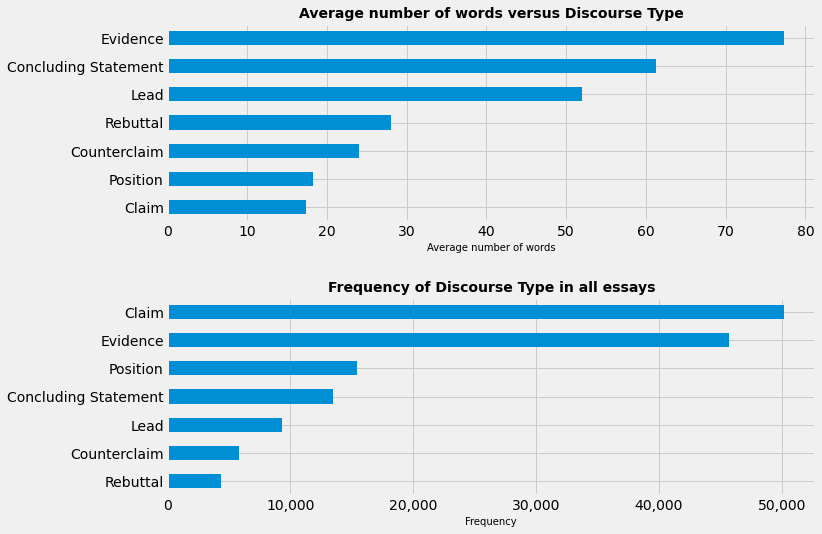

In [15]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
ax1 = train.groupby('discourse_type')['discourse_len'].mean().sort_values().plot(kind="barh")
ax1.set_title("Average number of words versus Discourse Type", fontsize=14, fontweight = 'bold')
ax1.set_xlabel("Average number of words", fontsize = 10)
ax1.set_ylabel("")

ax2 = fig.add_subplot(212)
ax2 = train.groupby('discourse_type')['discourse_type'].count().sort_values().plot(kind="barh")
ax2.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) #add thousands separator
ax2.set_title("Frequency of Discourse Type in all essays", fontsize=14, fontweight = 'bold')
ax2.set_xlabel("Frequency", fontsize = 10)
ax2.set_ylabel("")

plt.tight_layout(pad=2)
plt.show()

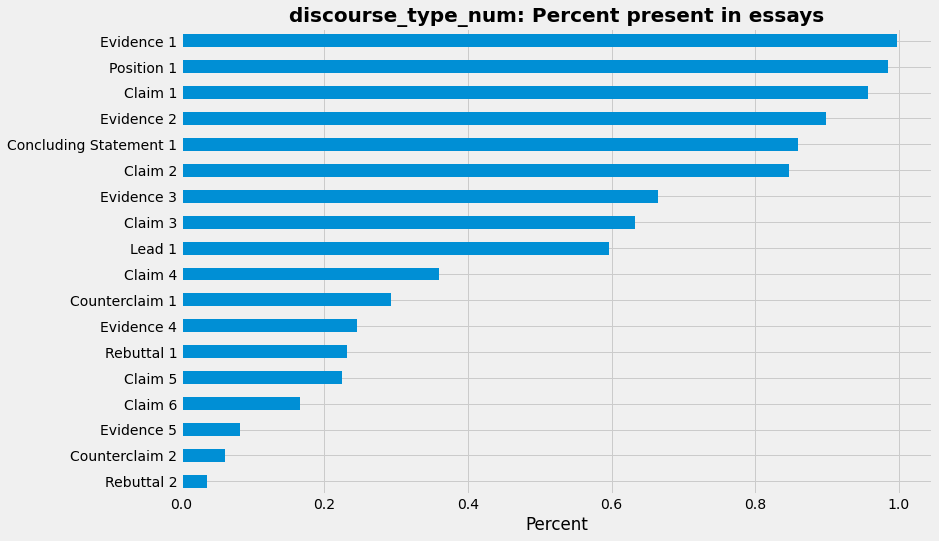

In [16]:
fig = plt.figure(figsize=(12,8))
av_per_essay = train['discourse_type_num'].value_counts(ascending = True).rename_axis('discourse_type_num').reset_index(name='count')
av_per_essay['perc'] = round((av_per_essay['count'] / train.id.nunique()),3)
av_per_essay = av_per_essay.set_index('discourse_type_num')
ax = av_per_essay.query('perc > 0.03')['perc'].plot(kind="barh")
ax.set_title("discourse_type_num: Percent present in essays", fontsize=20, fontweight = 'bold')
ax.set_xlabel("Percent")
ax.set_ylabel("")
plt.show()

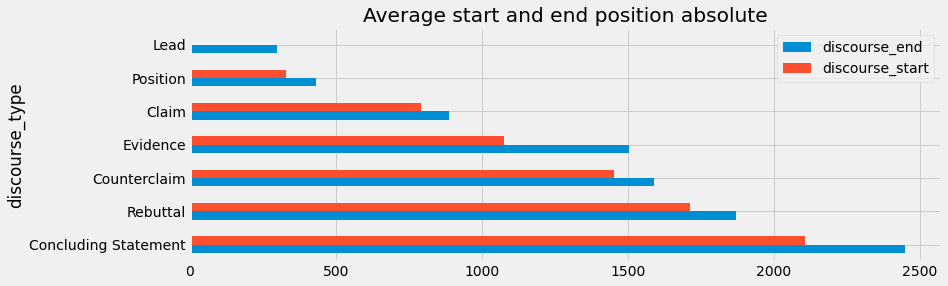

In [17]:
data = train.groupby("discourse_type")[['discourse_end', 'discourse_start']].mean().reset_index().sort_values(by = 'discourse_start', ascending = False)
data.plot(x='discourse_type',
        kind='barh',
        stacked=False,
        title='Average start and end position absolute',
        figsize=(12,4))
plt.show()

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

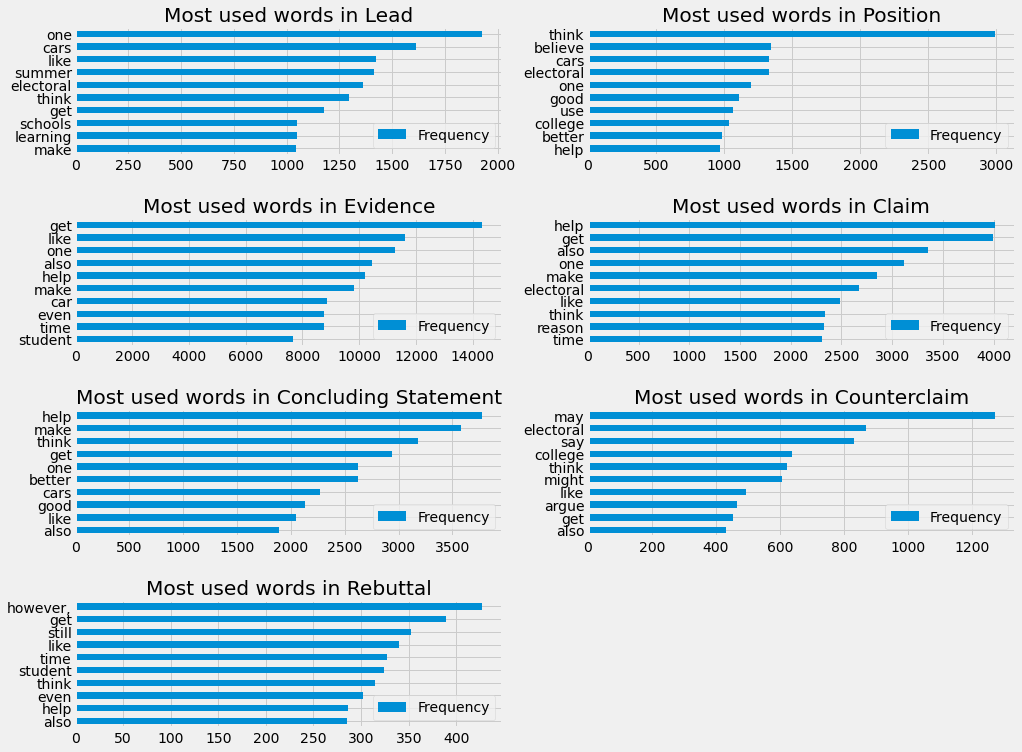

In [19]:
train['discourse_text'] = train['discourse_text'].str.lower()

#get stopwords from nltk library
stop_english = stopwords.words("english")
other_words_to_take_out = ['school', 'students', 'people', 'would', 'could', 'many']
stop_english.extend(other_words_to_take_out)

#put dataframe of Top-10 words in dict for all discourse types
counts_dict = {}
for dt in train['discourse_type'].unique():
    df = train.query('discourse_type == @dt')
    text = df.discourse_text.apply(lambda x: x.split()).tolist()
    text = [item for elem in text for item in elem]
    df1 = pd.Series(text).value_counts().to_frame().reset_index()
    df1.columns = ['Word', 'Frequency']
    df1 = df1[~df1.Word.isin(stop_english)].head(10)
    df1 = df1.set_index("Word").sort_values(by = "Frequency", ascending = True)
    counts_dict[dt] = df1

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

keys = list(counts_dict.keys())

for n, key in enumerate(keys):
    ax = plt.subplot(4, 2, n + 1)
    ax.set_title(f"Most used words in {key}")
    counts_dict[keys[n]].plot(ax=ax, kind = 'barh')
    plt.ylabel("")

plt.show()

In [20]:
def get_n_grams(n_grams, top_n = 10):
    df_words = pd.DataFrame()
    for dt in tqdm(train['discourse_type'].unique()):
        df = train.query('discourse_type == @dt')
        texts = df['discourse_text'].tolist()
        vec = CountVectorizer(lowercase = True, stop_words = 'english',\
                              ngram_range=(n_grams, n_grams)).fit(texts)
        bag_of_words = vec.transform(texts)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        cvec_df = pd.DataFrame.from_records(words_freq,\
                                            columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
        cvec_df.insert(0, "Discourse_type", dt)
        cvec_df = cvec_df.iloc[:top_n,:]
        df_words = df_words.append(cvec_df)
    return df_words

In [21]:
bigrams = get_n_grams(n_grams = 2, top_n=10)
bigrams.head()

  0%|          | 0/7 [00:00<?, ?it/s]

,Discourse_type,words,counts
73564,Lead,electoral college,1179
63518,Lead,driverless cars,808
55,Lead,cell phones,592
19359,Lead,summer projects,513
85397,Lead,distance learning,468


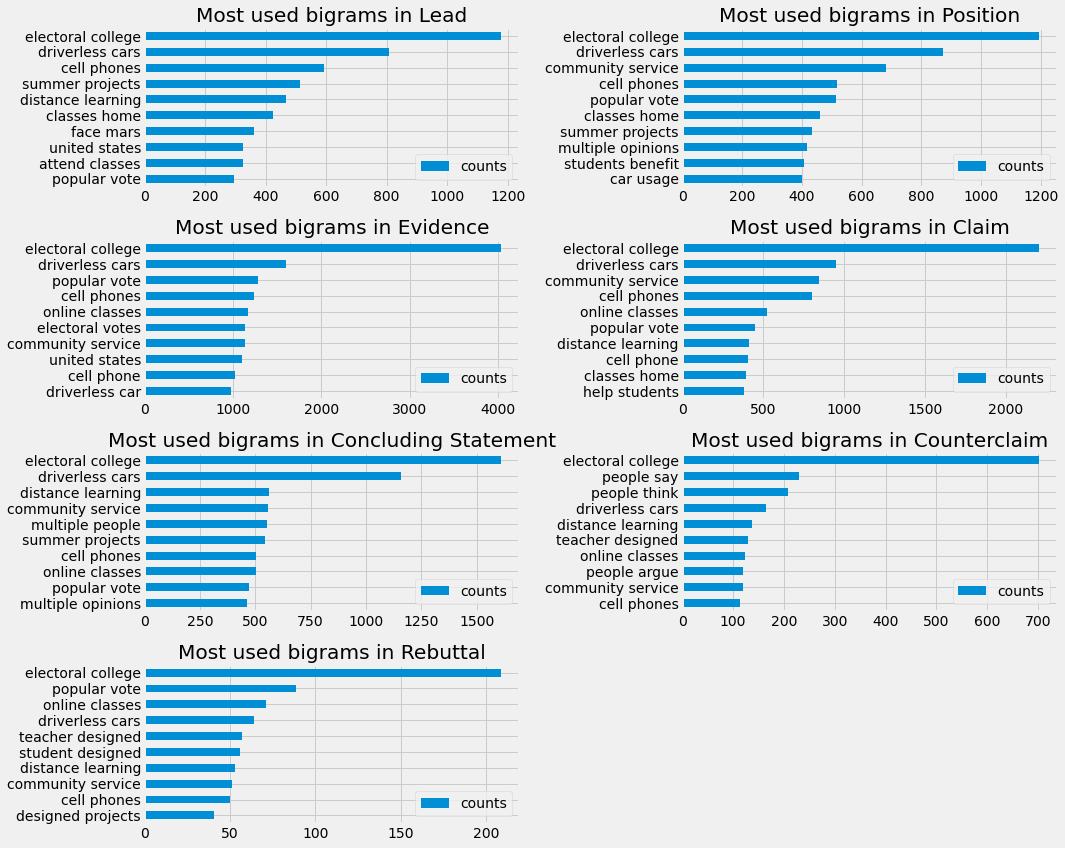

In [22]:
def plot_ngram(df, type = "bigrams"):
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.5)

    for n, dt in enumerate(df.Discourse_type.unique()):
        ax = plt.subplot(4, 2, n + 1)
        ax.set_title(f"Most used {type} in {dt}")
        data = df.query('Discourse_type == @dt')[['words', 'counts']].set_index("words").sort_values(by = "counts", ascending = True)
        data.plot(ax=ax, kind = 'barh')
        plt.ylabel("")
    plt.tight_layout()
    plt.show()
    
plot_ngram(bigrams)

  0%|          | 0/7 [00:00<?, ?it/s]

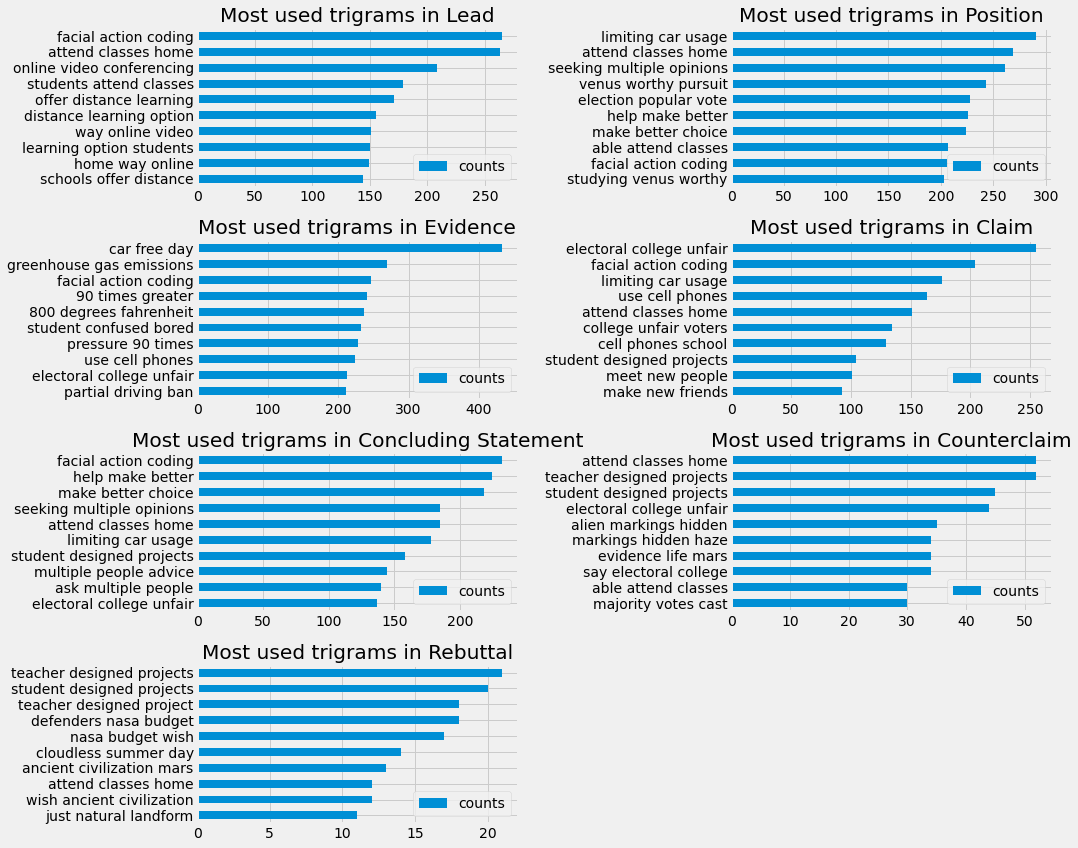

In [23]:
trigrams = get_n_grams(n_grams = 3, top_n=10)
plot_ngram(trigrams, type = "trigrams")

In [24]:
test_names, train_texts = [], []
for f in tqdm(list(os.listdir('/content/drive/MyDrive/brAIns/feedback/train/'))):
    test_names.append(f.replace('.txt', ''))
    train_texts.append(open('/content/drive/MyDrive/brAIns/feedback/train/' + f, 'r').read())
train_text_df = pd.DataFrame({'id': test_names, 'text': train_texts})
train_text_df.head()

  0%|          | 0/15594 [00:00<?, ?it/s]

,id,text
0,F1973E9DB4CF,"Dear TEACHER_NAME,\n\nI believe that students ..."
1,F8ECBEE8609E,"Dear, Principle\n\nI don't think that it is fa..."
2,F71859A3B336,"Dear, senator I hereby to inform you that I'm ..."
3,F52CEA3A4C39,Driverless cars can be very useful in the near...
4,F78C425E3D48,many kids on a daily basis are juggling betwee...


In [24]:
all_entities = []
#loop over dataframe with all full texts
for i in tqdm(range(len(train_text_df))):
    total = len(train_text_df.loc[i, 'text'].split())
    #now a list with length the total number of words in an essay is initialised with all values being "O"
    entities = ["O"]*total
    #now loop over dataframe with all discourses of this particular essay
    discourse_id = train_text_df.loc[i, 'id']
    train_df_id = train.query('id == @discourse_id').reset_index(drop=True)
    for j in range(len(train_df_id)):
        discourse = train_df_id.loc[j, 'discourse_type']
        #make a list with the position numbers in predictionstring converted into integer
        list_ix = [int(x) for x in train_df_id.loc[j, 'predictionstring'].split(' ')]
        #now the entities lists gets overwritten where there are discourse identified by the experts
        #the first word of each discourse gets prefix "Beginning"
        entities[list_ix[0]] = f"B-{discourse}"
        #the other ones get prefix I
        for k in list_ix[1:]: entities[k] = f"I-{discourse}"
    all_entities.append(entities)
    
    
train_text_df['entities'] = all_entities

In [26]:
train_text_df.head(20)

,id,text
0,F1973E9DB4CF,"Dear TEACHER_NAME,\n\nI believe that students ..."
1,F8ECBEE8609E,"Dear, Principle\n\nI don't think that it is fa..."
2,F71859A3B336,"Dear, senator I hereby to inform you that I'm ..."
3,F52CEA3A4C39,Driverless cars can be very useful in the near...
4,F78C425E3D48,many kids on a daily basis are juggling betwee...
5,F173E4A2271E,"Dear Principal,\n\nI don't think it's a very g..."
6,EE92D5471D45,"Dear, Principal\n\nHey, i just want to tell yo..."
7,ECF8296772E9,In the story the aurther is describing why Ven...
8,FB7A42A10DCE,The concept of aliens is a topic that some of ...
9,FC481B7DC611,How was the Face on Mars created? The face on ...
